Network Slicing using Semisupervised Classification which is a Semi Supervised Learning Technique using Self-Training Method.

In [1]:
# Random Seed for Under-sampling, Data-split and Modeling
import random
#Under-sampling
a = random.randint(10, 99)
# a = 65

# Data-split labelled and unlabelled
b1 = random.randint(10, 99)
# b1 = 52

#Data-split train and test
b2 = 42

#Data Modeling
# c = 42

#Data-split labelled and unlabelled
Z = 0.10

In [2]:
a

57

In [3]:
b1

15

# **Data Pre-processing**

### **Import Libraries**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Load Dataset**

In [6]:
# data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
data = pd.read_csv('/content/drive/MyDrive/Dataset/deepslice_data.csv.zip')
data

,Unnamed: 0,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,1,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,2,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,3,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,4,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,5,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...,...
63162,63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,63166,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [7]:
data_backup = data
data_backup

,Unnamed: 0,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,1,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,2,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,3,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,4,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,5,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...,...
63162,63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,63166,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [8]:
data.columns.tolist()

['Unnamed: 0',
 'Use Case',
 'LTE/5g Category',
 'Technology Supported',
 'Day',
 'Time',
 'GBR',
 'Packet Loss Rate',
 'Packet delay',
 'slice Type']

In [9]:
data['LTE/5g Category'].value_counts()

,count
LTE/5g Category,
12,3024
11,3024
18,3024
17,3024
16,3024
15,3024
14,3024
13,3024
2,3024


In [10]:
data['Technology Supported'].value_counts()

,count
Technology Supported,
LTE/5G,33599
"IoT(LTE-M, NB-IoT)",29568


In [11]:
data = data.drop(data.columns[0], axis=1)
data

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...
63162,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [12]:
data = data.drop(['LTE/5g Category','Day','Time'], axis=1)
data

,Use Case,Technology Supported,GBR,Packet Loss Rate,Packet delay,slice Type
0,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
1,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
2,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
3,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
4,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...
63162,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63163,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63164,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63165,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC


### **Data Distribution by "Use Case"**

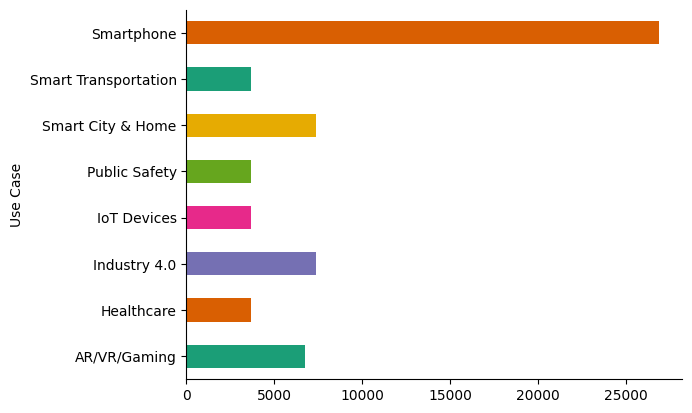

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Use Case').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Conversion of Feature Columns (Categorial to Numerical)**

using one-hot encoding

In [14]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Use Case', 'Technology Supported', 'GBR'])
one_hot_encoded_data

,Packet Loss Rate,Packet delay,slice Type,Use Case_AR/VR/Gaming,Use Case_Healthcare,Use Case_Industry 4.0,Use Case_IoT Devices,Use Case_Public Safety,Use Case_Smart City & Home,Use Case_Smart Transportation,Use Case_Smartphone,"Technology Supported_IoT(LTE-M, NB-IoT)",Technology Supported_LTE/5G,GBR_GBR,GBR_Non-GBR
0,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
1,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
2,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
3,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
4,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63163,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63164,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63165,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True


In [15]:
data_ohe = one_hot_encoded_data.rename(columns={'Use Case_AR/VR/Gaming':'AR/VR/Gaming','Use Case_Healthcare':'Healthcare','Use Case_Industry 4.0':'Industry 4.0','Use Case_IoT Devices':'IoT Devices','Use Case_Public Safety':'Public Safety','Use Case_Smart City & Home':'Smart City & Home','Use Case_Smart Transportation':'Smart Transportation','Use Case_Smartphone':'Smartphone','Technology Supported_IoT(LTE-M, NB-IoT)':'IoT','Technology Supported_LTE/5G':'LTE/5G','GBR_GBR':'GBR','GBR_Non-GBR':'Non-GBR'})
data_ohe

,Packet Loss Rate,Packet delay,slice Type,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,IoT,LTE/5G,GBR,Non-GBR
0,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
1,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
2,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
3,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
4,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63163,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63164,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63165,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True


In [16]:
data = data_ohe[['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone', 'slice Type']]
data

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
1,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
2,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
3,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
4,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63163,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63164,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63165,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC


In [17]:
# Replace boolean values with 0 and 1 in specified columns
columns_to_convert = ["IoT", "LTE/5G", "GBR", "Non-GBR", "AR/VR/Gaming", "Healthcare", "Industry 4.0", "IoT Devices", "Public Safety", "Smart City & Home", "Smart Transportation", "Smartphone"]
for column in columns_to_convert:
    data[column] = data[column].replace({False: 0, True: 1})

data

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
1,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
2,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
3,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
4,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63163,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63164,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63165,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC


### **Class Distribution Analysis**

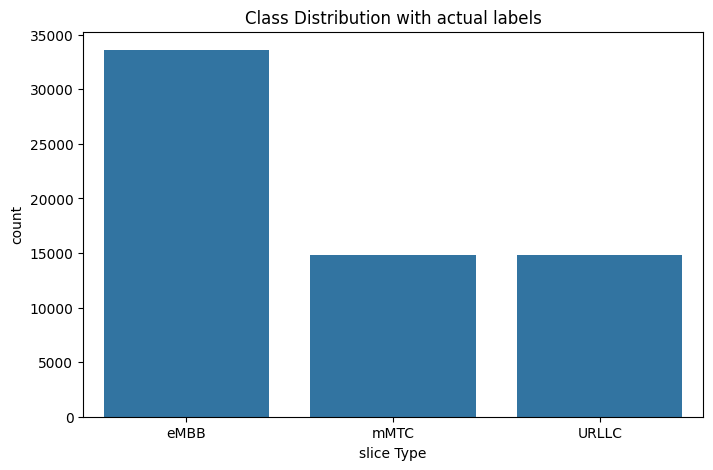

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

#### Heatmaps

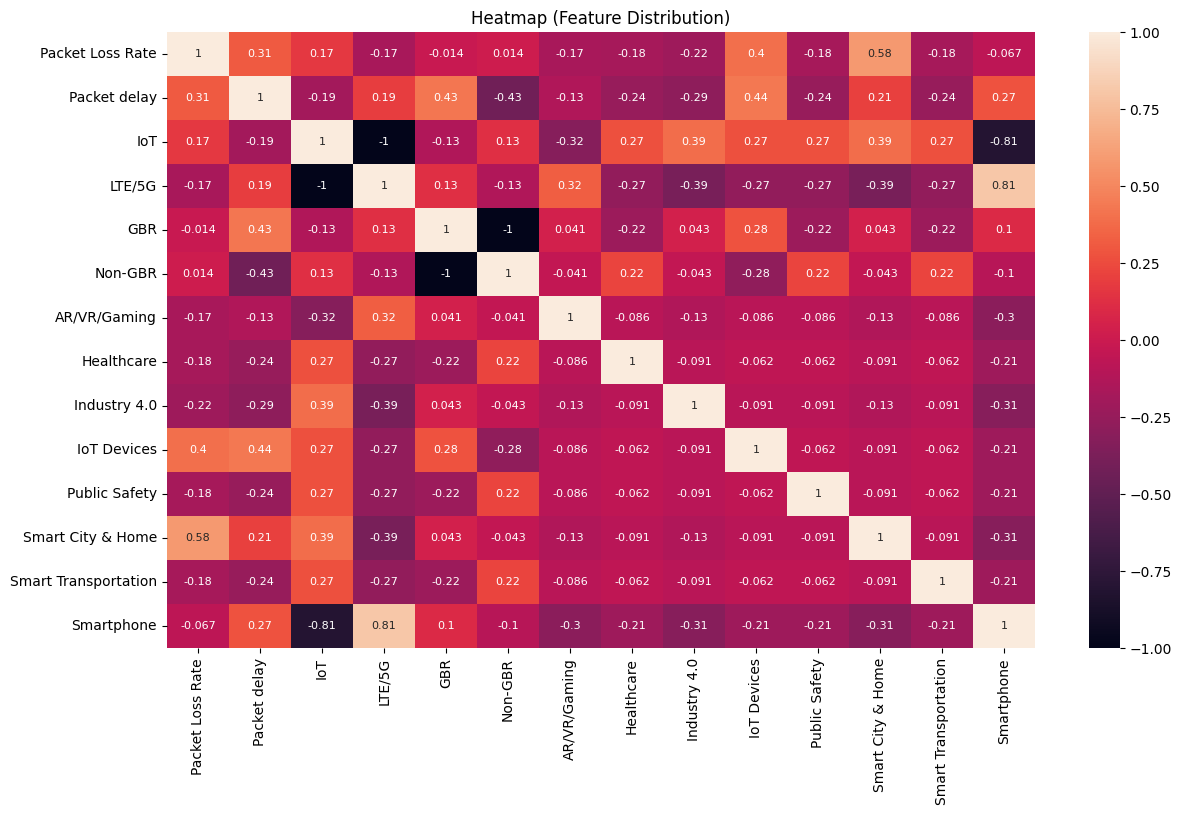

In [19]:
# Create a heatmap for the correlation matrix of all features
plt.figure(figsize=(14, 8))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution)')
plt.show()

### **Relevant Feature Selection**

In [20]:
# Select relevant features for clustering (excluding LTE/5g Category and Time)
# X = data.drop(['LTE/5g Category', 'Time'], axis=1)
# features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone']
features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'Packet delay']
# features = ['Packet Loss Rate']

#### Heatmaps

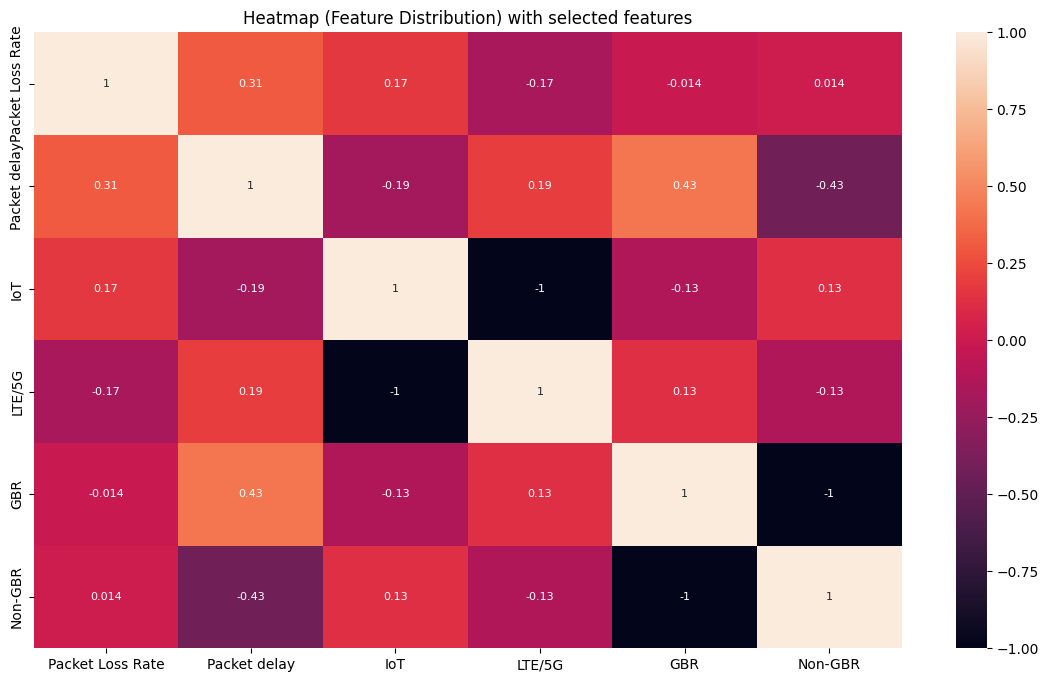

In [21]:
# Create a heatmap for the correlation matrix of all selected features
plt.figure(figsize=(14, 8))
sns.heatmap(data[features].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution) with selected features')
plt.show()

# **Data Split**

### **Define X and y**

In [22]:
X = data[features]
X

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.010000,100,0,1,0,1
1,0.010000,100,0,1,0,1
2,0.010000,100,0,1,0,1
3,0.010000,100,0,1,0,1
4,0.010000,100,0,1,0,1
...,...,...,...,...,...,...
63162,0.000001,10,1,0,0,1
63163,0.000001,10,1,0,0,1
63164,0.000001,10,1,0,0,1
63165,0.000001,10,1,0,0,1


In [23]:
y = data['slice Type']
y

,slice Type
0,eMBB
1,eMBB
2,eMBB
3,eMBB
4,eMBB
...,...
63162,URLLC
63163,URLLC
63164,URLLC
63165,URLLC


### **t-SNE - Dimensionality Reduction**

In [24]:
X_backup = X
X_backup

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.010000,100,0,1,0,1
1,0.010000,100,0,1,0,1
2,0.010000,100,0,1,0,1
3,0.010000,100,0,1,0,1
4,0.010000,100,0,1,0,1
...,...,...,...,...,...,...
63162,0.000001,10,1,0,0,1
63163,0.000001,10,1,0,0,1
63164,0.000001,10,1,0,0,1
63165,0.000001,10,1,0,0,1


In [25]:
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(X)
X_tsne

array([[  13.224804 , -124.9993   ],
       [  13.224804 , -124.9993   ],
       [  13.224804 , -124.9993   ],
       ...,
       [-123.966156 ,   -2.3899918],
       [-123.966156 ,   -2.3899918],
       [-123.966156 ,   -2.3899918]], dtype=float32)

In [26]:
X = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1]})
X

,Feature 1,Feature 2
0,13.224804,-124.999298
1,13.224804,-124.999298
2,13.224804,-124.999298
3,13.224804,-124.999298
4,13.224804,-124.999298
...,...,...
63162,-123.966156,-2.389992
63163,-123.966156,-2.389992
63164,-123.966156,-2.389992
63165,-123.966156,-2.389992


#### Pair Plots

In [27]:
# sns.pairplot(X)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

In [28]:
data = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1], 'slice Type': y})
data

,Feature 1,Feature 2,slice Type
0,13.224804,-124.999298,eMBB
1,13.224804,-124.999298,eMBB
2,13.224804,-124.999298,eMBB
3,13.224804,-124.999298,eMBB
4,13.224804,-124.999298,eMBB
...,...,...,...
63162,-123.966156,-2.389992,URLLC
63163,-123.966156,-2.389992,URLLC
63164,-123.966156,-2.389992,URLLC
63165,-123.966156,-2.389992,URLLC


In [29]:
features = ['Feature 1', 'Feature 2']

### **Define Unlabelled and Labelled Dataset**

In [30]:
print(b1)
print(Z)

15
0.1


In [31]:
# Split the dataset into training and testing sets
# X_labelled = X_train
# X_unlabelled = X_test
# y_labelled = y_train
# y_unlabelled = y_test

X_labelled, X_unlabelled, y_labelled, y_unlabelled = train_test_split(X,y, train_size=Z, random_state=b1)

In [32]:
X_labelled

,Feature 1,Feature 2
11146,11.780458,81.808334
1453,13.224804,-124.999298
40489,-123.966156,-2.389992
50124,-123.966156,-2.389992
53472,132.817749,-111.010040
...,...,...
49015,-123.966156,-2.389992
2693,13.224804,-124.999298
8076,99.299370,6.755680
52981,132.817749,-111.010040


In [33]:
X_unlabelled

,Feature 1,Feature 2
50792,-123.966156,-2.389992
41809,-115.037819,-147.597336
50879,-123.966156,-2.389992
53220,132.817749,-111.010040
29562,-139.593002,141.917740
...,...,...
53534,132.817749,-111.010040
20947,-40.638390,193.148438
50188,-123.966156,-2.389992
40682,-123.966156,-2.389992


# **Data Modelling and Analysis**

## **Base Model Training**

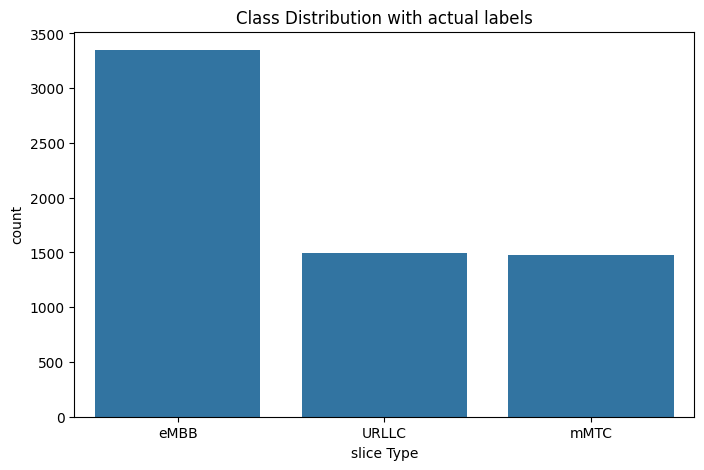

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_labelled)
plt.title('Class Distribution with actual labels')
plt.show()

### **Under Sampling - Class Imbalance Issue**

In [35]:
print(a)

57


In [36]:
# Get the column names from the original DataFrame
X_labelled_column_names = X_labelled.columns.tolist()
X_labelled_column_names

['Feature 1', 'Feature 2']

In [37]:
# Convert X_unlabelled to a pandas DataFrame
X_labelled_df = pd.DataFrame(X_labelled, columns=X_labelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
X_labelled_with_labels = X_labelled_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_labelled_with_labels.reset_index(drop=True, inplace=True)
y_labelled.reset_index(drop=True, inplace=True)
y_labelled = pd.Series(y_labelled, name='slice Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_labelled_with_labels['slice Type'] = y_labelled

X_labelled_with_labels

,Feature 1,Feature 2,slice Type
0,11.780458,81.808334,eMBB
1,13.224804,-124.999298,eMBB
2,-123.966156,-2.389992,URLLC
3,-123.966156,-2.389992,URLLC
4,132.817749,-111.010040,mMTC
...,...,...,...
6311,-123.966156,-2.389992,URLLC
6312,13.224804,-124.999298,eMBB
6313,99.299370,6.755680,eMBB
6314,132.817749,-111.010040,mMTC


In [38]:
# Identify the majority class
majority_class = X_labelled_with_labels['slice Type'].value_counts().idxmax()
print("Majority Class: ", majority_class)

# Count the number of data points in the majority class
majority_count = X_labelled_with_labels['slice Type'].value_counts()[majority_class]
print("Majority Class Count: ", majority_count)

# Count the number of data points in the other two classes
minority_count = X_labelled_with_labels['slice Type'].value_counts().min()
print("Minority Class Count: ", minority_count)

# Calculate the number of data points to remove from the majority class
num_to_remove = majority_count - minority_count
print("Amount of Data to be removed: ", num_to_remove)

# Randomly select data points from the majority class to remove
majority_indices = X_labelled_with_labels[X_labelled_with_labels['slice Type'] == majority_class].index
np.random.seed(a)
remove_indices = np.random.choice(majority_indices, size=num_to_remove, replace=False)
print("Indices to be removed: \n", remove_indices[:100])

# Remove the selected data points from the DataFrame
balanced_data = X_labelled_with_labels.drop(remove_indices)

Majority Class:  eMBB
Majority Class Count:  3348
Minority Class Count:  1475
Amount of Data to be removed:  1873
Indices to be removed: 
 [3081 2921 5997  797 2855 3826  198 4467 1582 5326 1785 5975 1810 2389
 5845 5565 3381 2153  343 5416 6029 5510  205 5073 2210 4260 1677 1610
 2552 3803 5265  157 5488 2965 2435 4240 4428  842 5587  420  137  541
 3358 1308   94 5214 1476 1293 4481 3177 5209 4210 4168 5220 5235 1491
 2620 4492   99 1504 1415  391 1369 5782  620 5481 2344 2614 1852 4471
   12 3385 2665 2048 2994 2059 3206 1655 4854 2633 2996 4072 4273  478
 4106 4142 4796 2834 2176   15 6266 1231 1809 1880 1368 2313 1388    6
 4983 2304]


In [39]:
balanced_data

,Feature 1,Feature 2,slice Type
0,11.780458,81.808334,eMBB
1,13.224804,-124.999298,eMBB
2,-123.966156,-2.389992,URLLC
3,-123.966156,-2.389992,URLLC
4,132.817749,-111.010040,mMTC
...,...,...,...
6309,-123.966156,-2.389992,URLLC
6310,-123.966156,-2.389992,URLLC
6311,-123.966156,-2.389992,URLLC
6312,13.224804,-124.999298,eMBB


In [40]:
balanced_data = balanced_data.reset_index(drop=True)
balanced_data

,Feature 1,Feature 2,slice Type
0,11.780458,81.808334,eMBB
1,13.224804,-124.999298,eMBB
2,-123.966156,-2.389992,URLLC
3,-123.966156,-2.389992,URLLC
4,132.817749,-111.010040,mMTC
...,...,...,...
4438,-123.966156,-2.389992,URLLC
4439,-123.966156,-2.389992,URLLC
4440,-123.966156,-2.389992,URLLC
4441,13.224804,-124.999298,eMBB


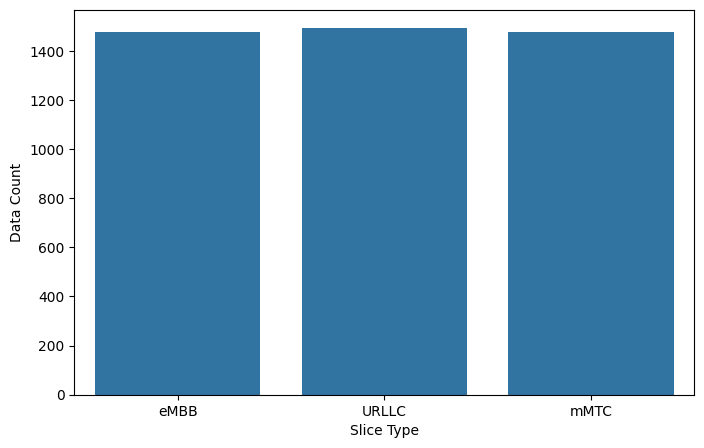

In [41]:
plt.figure(figsize=(8, 5))
sns.countplot(x=balanced_data['slice Type'])
# plt.title('Balanced Class Distribution with actual labels')
plt.xlabel('Slice Type')
plt.ylabel('Data Count')
plt.show()

In [42]:
X_labelled = balanced_data[features]
X_labelled

,Feature 1,Feature 2
0,11.780458,81.808334
1,13.224804,-124.999298
2,-123.966156,-2.389992
3,-123.966156,-2.389992
4,132.817749,-111.010040
...,...,...
4438,-123.966156,-2.389992
4439,-123.966156,-2.389992
4440,-123.966156,-2.389992
4441,13.224804,-124.999298


In [43]:
y_labelled = balanced_data['slice Type']
y_labelled

,slice Type
0,eMBB
1,eMBB
2,URLLC
3,URLLC
4,mMTC
...,...
4438,URLLC
4439,URLLC
4440,URLLC
4441,eMBB


### **Training**

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model_RFC_base = RandomForestClassifier()
model_RFC_base.fit(X_labelled, y_labelled)

RandomForestClassifier()

## **Pseudo Label Creation**

In [46]:
pseudo_labels = model_RFC_base.predict(X_unlabelled)

In [47]:
accuracy_RFC = accuracy_score(y_unlabelled, pseudo_labels)
print(f"Accuracy: {accuracy_RFC:.2f}")

Accuracy: 1.00


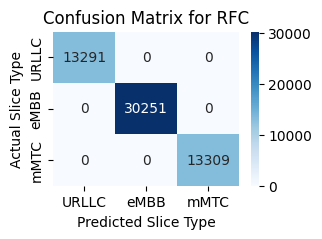

In [48]:
# Confusion Matrix
cm_RFC = confusion_matrix(y_unlabelled, pseudo_labels)
plt.figure(figsize=(3, 2))
sns.heatmap(cm_RFC, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for RFC')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

## **New Dataset Creation**

In [49]:
# Get the column names from the original DataFrame
X_unlabelled_column_names = X_unlabelled.columns.tolist()
X_unlabelled_column_names

['Feature 1', 'Feature 2']

In [50]:
# Convert X_unlabelled to a pandas DataFrame
X_unlabelled_df_RFC = pd.DataFrame(X_unlabelled, columns=X_unlabelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
X_unlabelled_with_pseudo_labels_RFC = X_unlabelled_df_RFC.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_unlabelled_with_pseudo_labels_RFC.reset_index(drop=True, inplace=True)
# pseudo_labels.reset_index(drop=True, inplace=True)
pseudo_labels = pd.Series(pseudo_labels, name='slice Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_unlabelled_with_pseudo_labels_RFC['slice Type'] = pseudo_labels

X_unlabelled_with_pseudo_labels_RFC

,Feature 1,Feature 2,slice Type
0,-123.966156,-2.389992,URLLC
1,-115.037819,-147.597336,mMTC
2,-123.966156,-2.389992,URLLC
3,132.817749,-111.010040,mMTC
4,-139.593002,141.917740,eMBB
...,...,...,...
56846,132.817749,-111.010040,mMTC
56847,-40.638390,193.148438,eMBB
56848,-123.966156,-2.389992,URLLC
56849,-123.966156,-2.389992,URLLC


In [51]:
# Get the column names from the original DataFrame
X_labelled_column_names = X_labelled.columns.tolist()
X_labelled_column_names

['Feature 1', 'Feature 2']

In [52]:
# Convert X_unlabelled to a pandas DataFrame
X_labelled_df_RFC = pd.DataFrame(X_labelled, columns=X_labelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
X_labelled_with_labels_RFC = X_labelled_df_RFC.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_labelled_with_labels_RFC.reset_index(drop=True, inplace=True)
y_labelled.reset_index(drop=True, inplace=True)
y_labelled = pd.Series(y_labelled, name='slice Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_labelled_with_labels_RFC['slice Type'] = y_labelled

X_labelled_with_labels_RFC

,Feature 1,Feature 2,slice Type
0,11.780458,81.808334,eMBB
1,13.224804,-124.999298,eMBB
2,-123.966156,-2.389992,URLLC
3,-123.966156,-2.389992,URLLC
4,132.817749,-111.010040,mMTC
...,...,...,...
4438,-123.966156,-2.389992,URLLC
4439,-123.966156,-2.389992,URLLC
4440,-123.966156,-2.389992,URLLC
4441,13.224804,-124.999298,eMBB


In [53]:
data_new = pd.concat([X_labelled_with_labels_RFC, X_unlabelled_with_pseudo_labels_RFC], ignore_index=True)
# data_new = data_new.dropna()
data_new

,Feature 1,Feature 2,slice Type
0,11.780458,81.808334,eMBB
1,13.224804,-124.999298,eMBB
2,-123.966156,-2.389992,URLLC
3,-123.966156,-2.389992,URLLC
4,132.817749,-111.010040,mMTC
...,...,...,...
61289,132.817749,-111.010040,mMTC
61290,-40.638390,193.148438,eMBB
61291,-123.966156,-2.389992,URLLC
61292,-123.966156,-2.389992,URLLC


### **New Classifier Model Training**

In [54]:
print(b2)

42


In [55]:
X = data_new[features]
X

,Feature 1,Feature 2
0,11.780458,81.808334
1,13.224804,-124.999298
2,-123.966156,-2.389992
3,-123.966156,-2.389992
4,132.817749,-111.010040
...,...,...
61289,132.817749,-111.010040
61290,-40.638390,193.148438
61291,-123.966156,-2.389992
61292,-123.966156,-2.389992


In [56]:
y = data_new['slice Type']
y

,slice Type
0,eMBB
1,eMBB
2,URLLC
3,URLLC
4,mMTC
...,...
61289,mMTC
61290,eMBB
61291,URLLC
61292,URLLC


In [57]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=b2)
X_train

,Feature 1,Feature 2
24727,206.162888,8.662295
56037,-123.966156,-2.389992
381,-123.966156,-2.389992
59569,-115.037819,-147.597336
34190,76.639557,189.082611
...,...,...
54343,-123.966156,-2.389992
38158,132.817749,-111.010040
860,132.817749,-111.010040
15795,11.780458,81.808334


In [58]:
X_test

,Feature 1,Feature 2
27049,-11.040947,-217.018219
51957,206.162888,8.662295
50547,132.817749,-111.010040
30533,-40.638390,193.148438
42544,-123.966156,-2.389992
...,...,...
4244,-123.966156,-2.389992
16338,-139.593002,141.917740
51204,-139.593002,141.917740
16152,11.780458,81.808334


In [59]:
model_RFC_new = RandomForestClassifier()
model_RFC_new.fit(X_train, y_train)

RandomForestClassifier()

# **Model Testing**

In [60]:
# Predict the labels for the test data
y_pred = model_RFC_new.predict(X_test)
y_pred

array(['mMTC', 'eMBB', 'mMTC', ..., 'eMBB', 'eMBB', 'URLLC'], dtype=object)

## **Update testing dataset with labels**

In [61]:
# Get the column names from the original DataFrame
X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
X_test_with_labels = X_test.copy()

# Resetting indices to avoid alignment issues
X_test_with_labels.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')
predicted_label = pd.Series(y_pred, name='predicted_label')

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['actual_label'] = actual_label

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['predicted_label'] = predicted_label

In [62]:
# Display the Updated Table
X_test_with_labels[:20]

,Feature 1,Feature 2,actual_label,predicted_label
0,-11.040947,-217.018219,mMTC,mMTC
1,206.162888,8.662295,eMBB,eMBB
2,132.817749,-111.010040,mMTC,mMTC
3,-40.638390,193.148438,eMBB,eMBB
4,-123.966156,-2.389992,URLLC,URLLC
5,-11.040947,-217.018219,mMTC,mMTC
6,-123.966156,-2.389992,URLLC,URLLC
7,-139.593002,141.917740,eMBB,eMBB
8,-123.966156,-2.389992,URLLC,URLLC
9,132.817749,-111.010040,mMTC,mMTC


## **Predicted Label Analysis**

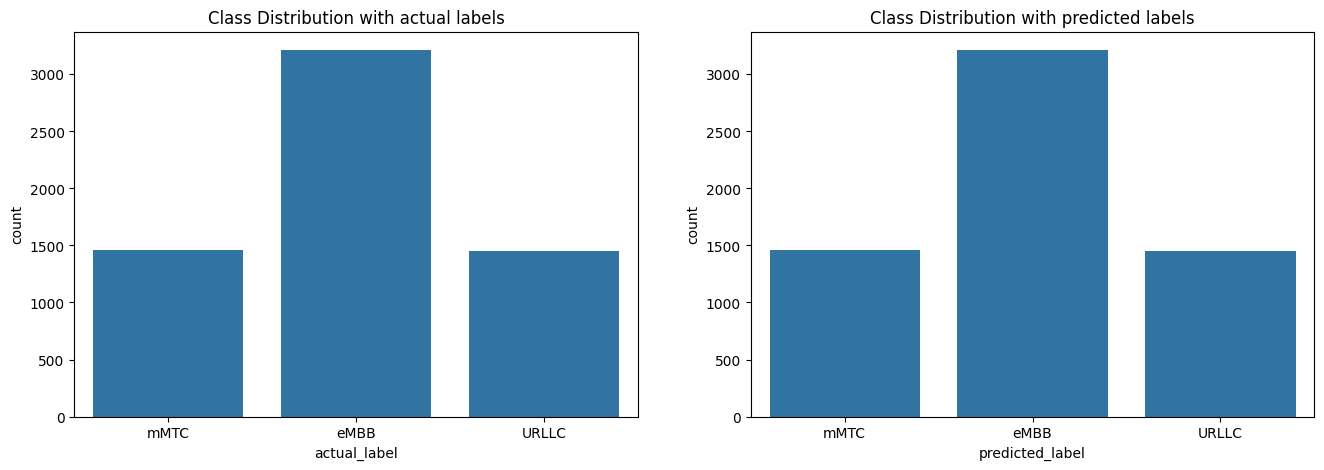

In [63]:
# Class Distribution

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x=actual_label, ax=axs[0])
axs[0].set_title('Class Distribution with actual labels')

sns.countplot(x=predicted_label, ax=axs[1])
axs[1].set_title('Class Distribution with predicted labels')

plt.show()

### **Confusion Matrix**

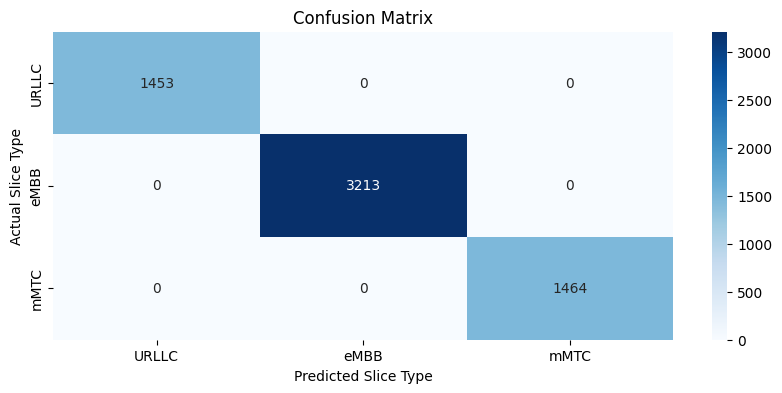

In [64]:
# Confusion Matrix
plt.figure(figsize=(10, 4))
cm = confusion_matrix(actual_label, predicted_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()
# print("\n", a, b, c)

In [65]:
# Calculate accuracy
print("Accuracy", accuracy_score(actual_label, predicted_label))

# Calculate precision
print("Precision", precision_score(actual_label, predicted_label, average='weighted'))

# Calculate recall
print("Recall", recall_score(actual_label, predicted_label, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

Accuracy 1.0
Precision 1.0
Recall 1.0
F1-score 1.0


In [66]:
# Calculate the Silhouette Score
silhouette_score_test = silhouette_score(X_test, predicted_label)

# Print or use the Silhouette Score for evaluation
print("Silhouette Score:", silhouette_score_test)

Silhouette Score: 0.38129216


In [67]:
# Calculate Davies-Bouldin Index
db_index_test = metrics.davies_bouldin_score(X_test, predicted_label)

# Print or use the DBI for evaluation
print("Davies-Bouldin Index for Testing(Labelled) Data:", db_index_test)

Davies-Bouldin Index for Testing(Labelled) Data: 0.9552817410977821


In [68]:
# Calculate the Adjusted Rand Index - It is the measure of the similarity of datapoints presents in the clusters and it ranges between 0 and 1
ar_index_test = adjusted_rand_score(actual_label, predicted_label)

# Print or use the ARI for evaluation
print("Adjusted Rand Index for Testing(Labelled) Data:", ar_index_test)

Adjusted Rand Index for Testing(Labelled) Data: 1.0


# **SYNC NOTEBOOKS**

In [70]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp11 - Slice_Identification_SemiSupML_Self-Training_undersampling_tsne.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'